# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 11.5??? Короче я все сделала + чуть чуть бонуски потыкала.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
!pip install folium

In [132]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [133]:
import numpy as np
import pandas as pd  # your favorite data package
import seaborn as sns # your favorite visualization package
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import math

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [134]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

df = pd.read_csv("train.csv")
df

id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198  

[1458644 rows x 11 columns]

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [135]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df=df.drop("dropoff_datetime", axis=1)
df["pickup_datetime"] = pd.to_datetime(df['pickup_datetime'])


In [136]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

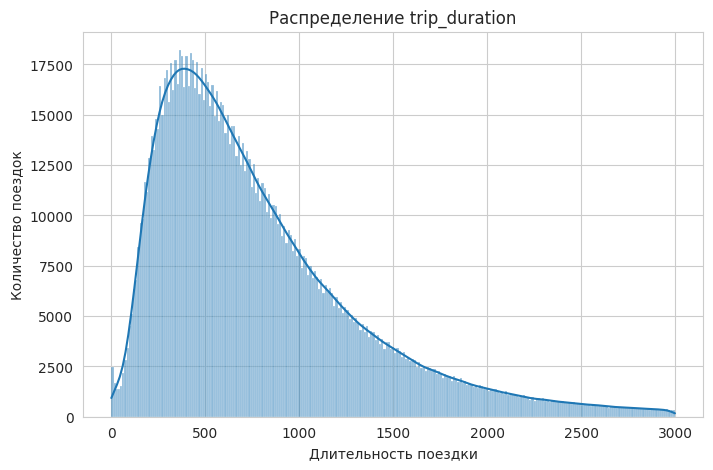

In [137]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
limit_duration = df[df['trip_duration'] <= 3000]
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
sns.histplot(limit_duration['trip_duration'], kde=True)
plt.title('Распределение trip_duration')
plt.xlabel('Длительность поездки')
plt.ylabel('Количество поездок')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Во-1 я могу сказать, что там какой-то страшный выброс присутствует из-за чего пришлось ограничить длительность поездки, чтобы на графике можно было что-то разглядеть.

Во-2 мы видим, что график отдаленно напоминает нормальное распределение, но чуть чуть сдвинутое

В-3 можно заметить, что наиболее распространены поедки длиной в около 500 секунд, чем длиннее поездка, тем меньше их количество, что согласуется с реальностью. Также очень коротких поездок также мало, так как обычно, если добираться меньше минуты условно, то нет смысла заказывать такси

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Я думаю, что это нужно, чтобы приблизить данные к нормальному распределению, мы так делали на семинарах

На семинаре мы рассматривали несколько моделей линейной регрессии в sklearn, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее логарифм. Обозначим  𝑦̂ 𝑖=log(𝑦𝑖+1)  — модифицированный таргет, а  𝑎̂ (𝑥𝑖)  — предсказание модели, которая обучалась на  𝑦̂ 𝑖 , то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания:  𝑎(𝑥𝑖)=exp(𝑎̂ (𝑥𝑖))−1 .

Вопрос: Покажите, что оптимизация RMSLE для модели  𝑎  эквивалентна оптимизации MSE для модели  𝑎̂  .

Доказательство: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ MSE задается следующим образом:
[ \text{MSE}(a, X) = \frac{1}{\ell} \sum_{i = 1}^{\ell} \left( a(x_i) - y_i \right)^2. ] \ В эту формулу мы подставляем заданные условием значения  𝑦𝑖ˆ  и  𝑎𝑖ˆ : [\hat{y}i = \log{(y_i + 1)}] [a(x_i) = \exp(\hat{a}(x_i)) - 1] [ \text{MSE}(a, X) = \frac{1}{\ell} \sum{i = 1}^{\ell} \left( \hat{a}(x_i) -\log{(y_i + 1)} \right)^2. ]
Можно сказать, что: [\log{(a(x_i) + 1) = \log(exp(\widehat{a}(x_i)))]
Тогда: [\log{(a(x_i) + 1)} =\widehat{a}(x_i) ]
То есть мы можем записать ту же![photo_2024-10-23_14-26-32.jpg](z) самую оптимизацию  RMSLE(𝑋,𝑦,𝑎)=1ℓ∑ℓ𝑖=1(log(𝑦𝑖+1)−log(𝑎(𝑥𝑖)+1))2‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾√  при возведении в квадрат как $\text{MSE}(a, X) = \frac{1}{\ell} \sum_{i = 1}^{\ell} \left( a(x_i) - y_i \right)^2$ Что и требовалось доказать

Я не понимаю, как работает тех в коллабе, так что вот скрин из латеха:

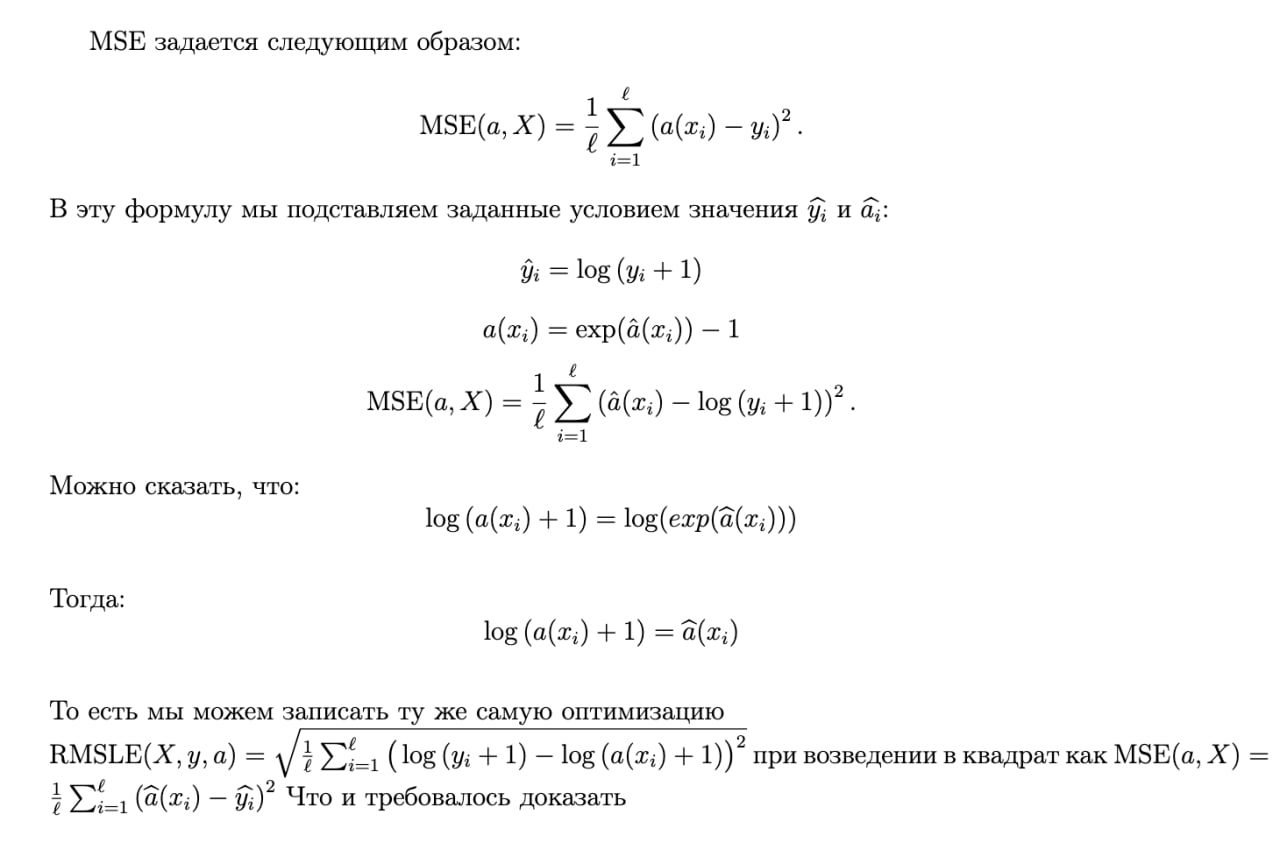

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку log_trip_duration (воспользуйтесь np.log1p) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [138]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['log_trip_duration'] = np.log1p(df["trip_duration"])

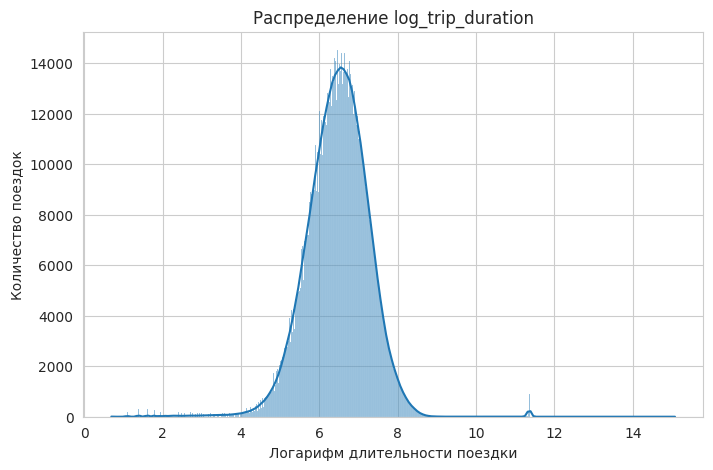

In [139]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
sns.histplot(df['log_trip_duration'], kde=True)
plt.title('Распределение log_trip_duration')
plt.xlabel('Логарифм длительности поездки')
plt.ylabel('Количество поездок')
plt.show()

In [140]:
df = df.drop('trip_duration', axis=1)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [141]:
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  
0               40.765602                  N           6.122493  
1               40.731152                  N           6.498282  
2               40.710087                  N           7.661527  
3               40.706718                  N           6.063785  
4               40.782520                  N           6.077642  
...                   ...                ...                ...  
1458639         40.740170                  N           6.658011  
1458640         40.796547                  N           6.486161  
1458641         40.707371                  N           6.639876  
1458642         40.757107                  N           5.924256  
1458643         40.790585                  N           5.293305  

[1458644 rows x 10 columns]

In [142]:
def rmsle(log1p_y_true, log1p_y_pred):
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    log1p_y_true = np.array(log1p_y_true, dtype=float)
    log1p_y_pred = np.array(log1p_y_pred, dtype=float)
    rmsle = np.sqrt(np.mean(np.power(log1p_y_true - log1p_y_pred, 2)))
    rmsle = np.array(rmsle, dtype=float)
    return rmsle
    raise NotImplementedError

log1p_y_true = (df['log_trip_duration'])
log1p_y_pred = np.full_like(log1p_y_true, np.mean(log1p_y_true)) #лучшая константная ошибка - это среднее
rmsle_best_const = rmsle(log1p_y_true, log1p_y_pred)
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

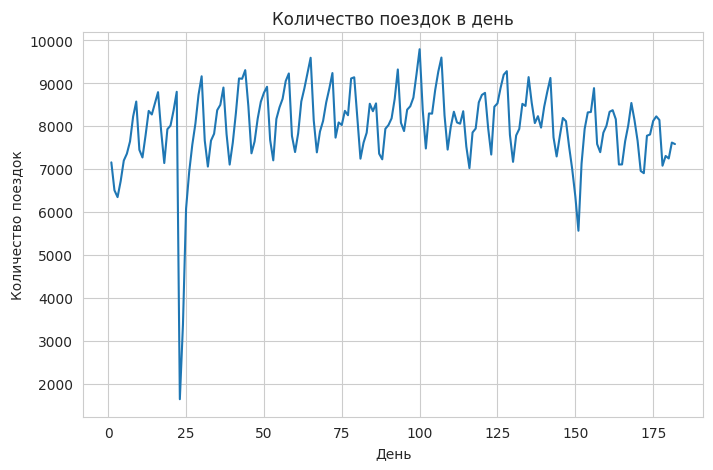

In [143]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
qua_of_trips = df.groupby(df['pickup_datetime'].dt.dayofyear)['id'].count()

sns.lineplot(x=qua_of_trips.index, y=qua_of_trips.values)
plt.title('Количество поездок в день')
plt.xlabel('День')
plt.ylabel('Количество поездок')
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [144]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
qua_of_trips = df.groupby(df['pickup_datetime'].dt.date)['id'].count()
help_table = pd.DataFrame(columns=['date', 'count'])
help_table['date'] = qua_of_trips.index
help_table['count'] = qua_of_trips.values
help_table

date  count
0    2016-01-01   7162
1    2016-01-02   6512
2    2016-01-03   6353
3    2016-01-04   6725
4    2016-01-05   7204
..          ...    ...
177  2016-06-26   7084
178  2016-06-27   7311
179  2016-06-28   7253
180  2016-06-29   7623
181  2016-06-30   7588

[182 rows x 2 columns]

In [145]:
help_table.nsmallest(1, 'count')

date  count
22  2016-01-23   1648

In [150]:
date1 = pd.to_datetime('2016-05-01').date()
help_table['date'] = pd.to_datetime(help_table['date'])
limit_help = help_table[help_table['date'].dt.date >= date1]

In [151]:
limit_help.nsmallest(1, 'count')

date  count
150 2016-05-30   5570

In [152]:
#Нужно для создания признаков в конце 1 части
date2 = pd.to_datetime('2016-01-23').date()

23.01.2016 в Нью Йорке было временно запрещено автомобильное движение из-за снежной бури

30.05.2016 произошел сбой в работе аэропорта Нью Йорка

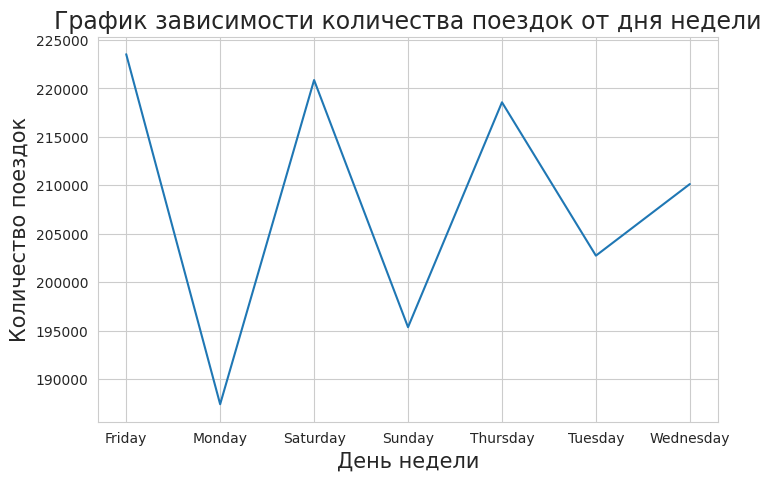

In [153]:
plt.figure(figsize = (8, 5))
sns.set_style('whitegrid')
plt.title('График зависимости количества поездок от дня недели', fontsize=17)
plt.xlabel('День недели', fontsize=15)
plt.ylabel('Количество поездок', fontsize=15)
df['name_day'] = df['pickup_datetime'].dt.day_name()
dur_of_trip_in_day = df.groupby(['name_day'])['id'].count().reset_index(name='count')
sns.lineplot(data=dur_of_trip_in_day, x='name_day', y='count')
plt.show()

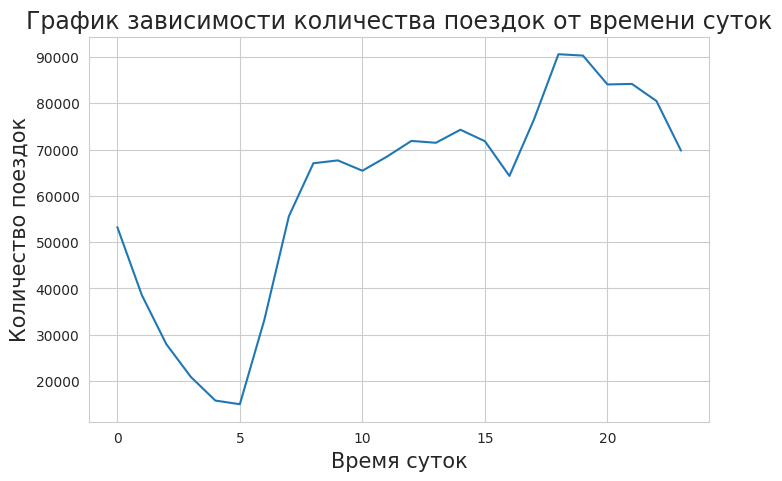

In [154]:
plt.figure(figsize = (8, 5))
sns.set_style('whitegrid')
plt.title('График зависимости количества поездок от времени суток', fontsize=17)
plt.xlabel('Время суток', fontsize=15)
plt.ylabel('Количество поездок', fontsize=15)
df['hour'] = df['pickup_datetime'].dt.hour
dur_of_trip = df.groupby(['hour'])['id'].count().reset_index(name='count')
sns.lineplot(data=dur_of_trip, x='hour', y='count')
plt.show()

Удалим созданные столбцы:

In [155]:
df = df.drop('name_day', axis=1)
df = df.drop('hour', axis=1)
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  
0               40.765602                  N           6.122493  
1               40.731152                  N           6.498282  
2               40.710087                  N           7.661527  
3               40.706718                  N           6.063785  
4               40.782520                  N           6.077642  
...                   ...                ...                ...  
1458639         40.740170                  N           6.658011  
1458640         40.796547                  N           6.486161  
1458641         40.707371                  N           6.639876  
1458642         40.757107                  N           5.924256  
1458643         40.790585                  N           5.293305  

[1458644 rows x 10 columns]

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

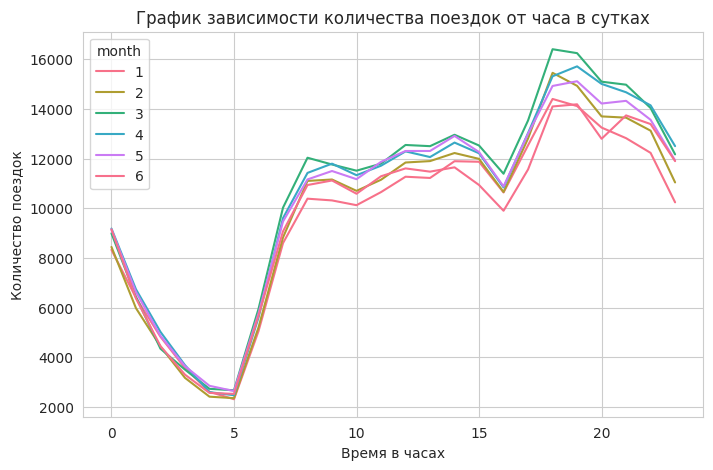

In [156]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['month'] = df['pickup_datetime'].dt.month
df['hour'] = df['pickup_datetime'].dt.hour
trips_in_month = df.groupby(['month', 'hour']).size().reset_index(name='trip_count')
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
sns.lineplot(data=trips_in_month, x='hour', y='trip_count', hue='month', palette='husl')
plt.title('График зависимости количества поездок от часа в сутках')
plt.xlabel('Время в часах')
plt.ylabel('Количество поездок')
plt.show()

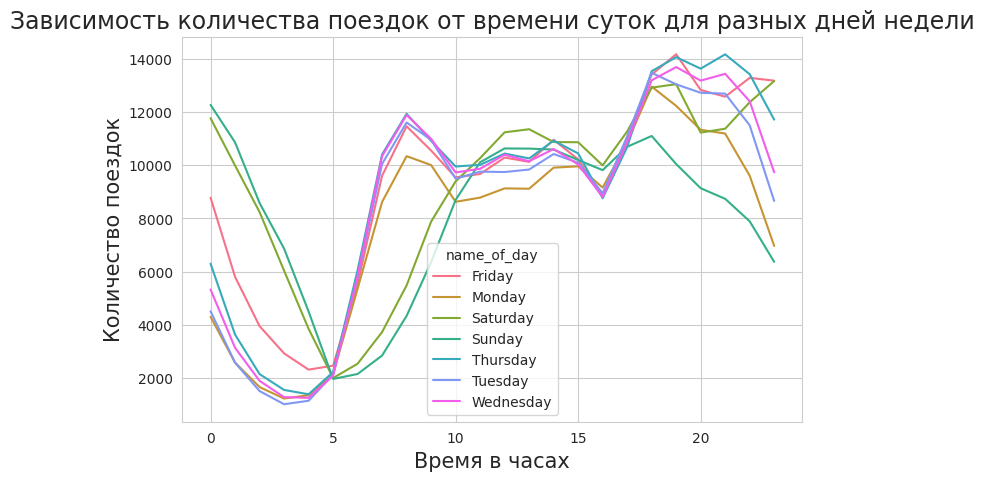

In [157]:
plt.figure(figsize = (8, 5))
sns.set_style('whitegrid')
plt.title('Зависимость количества поездок от времени суток для разных дней недели', fontsize=17)
plt.xlabel('Время в часах', fontsize=15)
plt.ylabel('Количество поездок', fontsize=15)
df['name_of_day'] = df['pickup_datetime'].dt.day_name()
trips_in_day = df.groupby(['name_of_day', 'hour']).size().reset_index(name='trip_count')
sns.lineplot(data=trips_in_day, x='hour', y='trip_count', hue='name_of_day', palette='husl')
plt.show()

In [158]:
df=df.drop("month", axis=1)
df=df.drop('hour', axis=1)
df=df.drop('name_of_day', axis=1)

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

Во все месяцы количество поездок следует практически единому тренду, наибольшее количество поездок достигается в 3 месяце (март). Не могу точно предположить, но это может быть связано с наплывом туристов, что странно. Можно заметить, что с 12 ночи (00 часов) количество поездок начинает падать, продолжает сокращаться до 5 утра и затем начинает расти, достигая пика вечером в 18-19 часов. Это может быть объяснено тем, что после 17 вечера люди заканчивают работу и предпочитают возвращаться домой на такси, ночью спрос на такси падает, так как многие уже дома спят, с утра по мере пробуждения людей количество поездок растет.

При рассмотрении графика поездок по дням в недели сразу бросается в глаза, что все дни кроме субботы и воскресенья имеют очень похожую динамику, в то время как у субботы и воскресения она чуть чуть сдвинутая. Это объясняется тем, что эти дни дня многих выходные, люди позже возвращаются домой, а также у них нет потребности уезжать с работы после 17.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [159]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#Возможно здесь имелось ввиду разбить выборку на х и у сразу, но я сделала это в пункте с построением регрессии
train_df, tets_df = train_test_split(df, test_size=0.3)

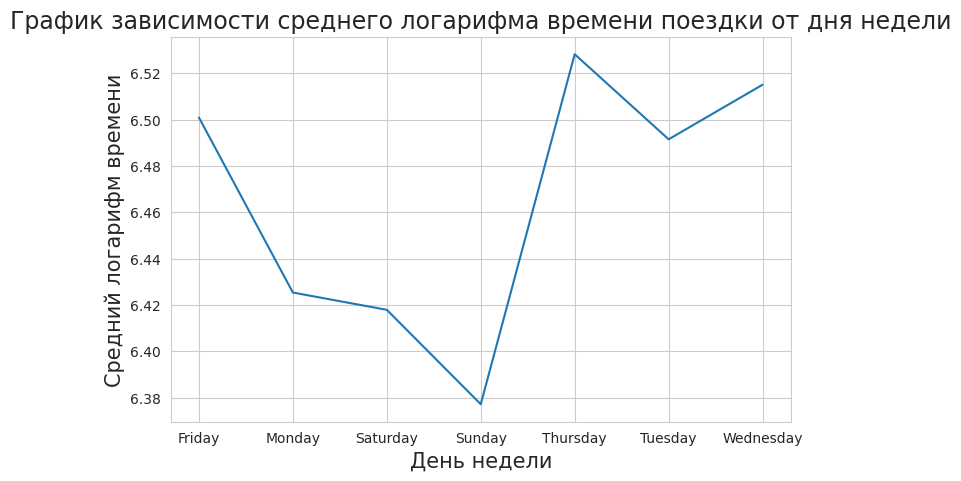

In [160]:
plt.figure(figsize = (8, 5))
sns.set_style('whitegrid')
plt.title('График зависимости среднего логарифма времени поездки от дня недели', fontsize=17)
plt.xlabel('День недели', fontsize=15)
plt.ylabel('Средний логарифм времени', fontsize=15)
train_df['name_day'] = train_df['pickup_datetime'].dt.day_name()
time_of_trip_in_day = train_df.groupby(['name_day'])['log_trip_duration'].mean().reset_index(name='duration')
sns.lineplot(data=time_of_trip_in_day, x='name_day', y='duration')
plt.show()

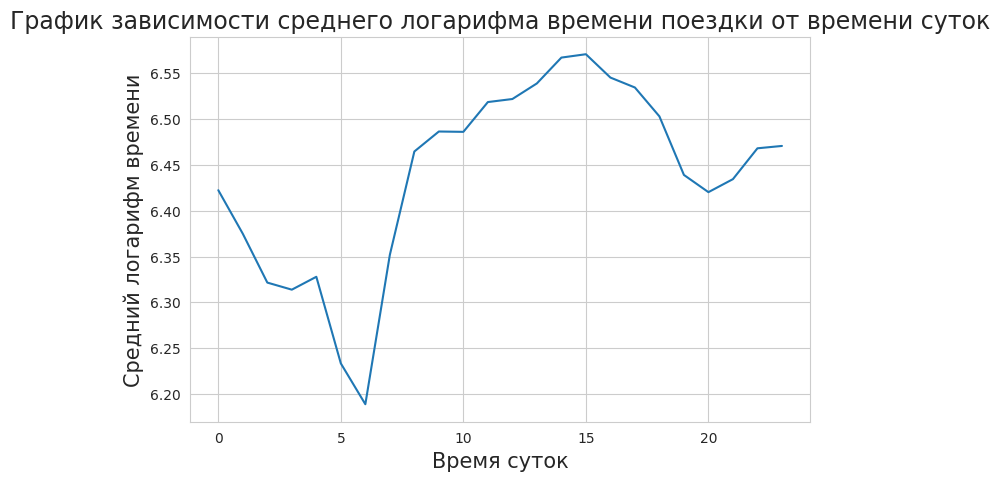

In [161]:
plt.figure(figsize = (8, 5))
sns.set_style('whitegrid')
plt.title('График зависимости среднего логарифма времени поездки от времени суток', fontsize=17)
plt.xlabel('Время суток', fontsize=15)
plt.ylabel('Средний логарифм времени', fontsize=15)
train_df['hour'] = train_df['pickup_datetime'].dt.hour
time_of_trip = train_df.groupby(['hour'])['log_trip_duration'].mean().reset_index(name='duration')
sns.lineplot(data=time_of_trip, x='hour', y='duration')
plt.show()

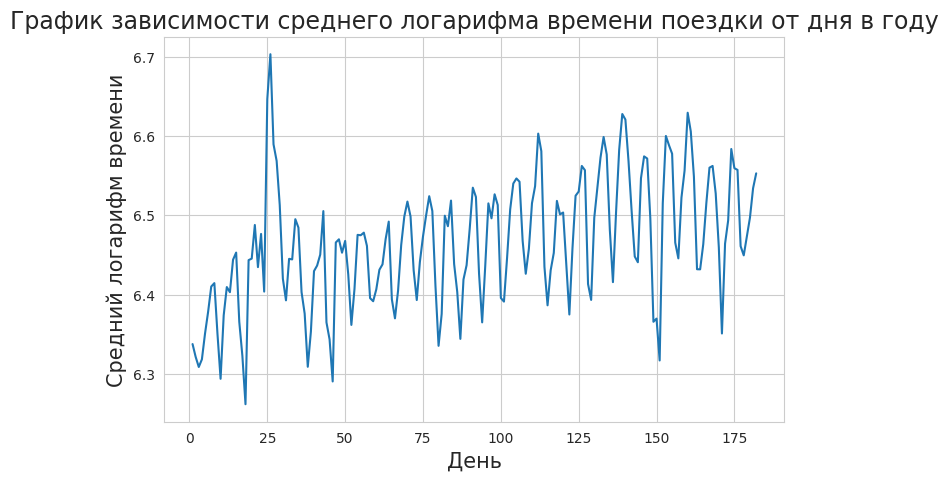

In [162]:
plt.figure(figsize = (8, 5))
sns.set_style('whitegrid')
plt.title('График зависимости среднего логарифма времени поездки от дня в году', fontsize=17)
plt.xlabel('День', fontsize=15)
plt.ylabel('Средний логарифм времени', fontsize=15)
train_df['day'] = train_df['pickup_datetime'].dt.dayofyear
day_of_trip = train_df.groupby(['day'])['log_trip_duration'].mean().reset_index(name='duration')
sns.lineplot(data=day_of_trip, x='day', y='duration')
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Графики зависимости таргета от дня недели и от часа в сутках не особо похожи на аналогичные графики для количества поездок, что кажется логичным, так как нет связи между количеством поездоу и их длительностью.

Говоря о двух аномальных периодах можно заметить, что в 1 случае средний логарифм времени поездки аномально высокий, а 2 ниже обычного тренда. Можно связать это с тем, что в 1 случае на Нью Йорк надвигалась буря и жители, зня об этом заказывали такси, чтобы выехать из Нью Йорка, пока не вышел запрет на пользование автомобилями. Таким образом, поездки совершались только утром, но они были длинными, так как жители стремились уехать из города. Во 2 аномалии дело было в сбое в работе аэропорта. Как известно, поездки из аэропорта достаточно длительные, поэтому, временно потеряв возможность возить людей из аэропорта в связи со сбоем сервисы наблюдали проседание среднего времени. При этом он просел не то чтобы прямо очень сильно относительно 1 аномалии, так как повлиял только на тех людей, которые планировали улетать или прилетали в этот день.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

Для начала очистим train_df от всех вспомогательных столбцов, созданных до этого

In [163]:
train_df = train_df.drop('name_day', axis=1)
train_df = train_df.drop('hour', axis=1)
train_df = train_df.drop('day', axis=1)
train_df

id  vendor_id     pickup_datetime  passenger_count  \
268341   id3190847          1 2016-01-12 07:04:46                1   
1064669  id1399257          1 2016-01-31 22:20:45                1   
1354554  id1567187          2 2016-03-18 20:34:26                3   
1421122  id3853401          2 2016-01-24 21:18:41                1   
368324   id2674193          2 2016-05-18 20:34:10                1   
...            ...        ...                 ...              ...   
512711   id3158837          2 2016-06-10 13:22:00                1   
254773   id1030704          2 2016-01-15 15:22:55                1   
213219   id2801051          2 2016-06-29 09:13:33                2   
1262036  id3970292          2 2016-04-20 08:25:48                1   
894814   id3345295          1 2016-01-19 15:04:16                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
268341         -73.885300        40.773052         -74.013771   
1064669        -73.995110        40.749947         -73.999924   
1354554        -74.009842        40.714825         -74.016846   
1421122        -73.986481        40.742889         -73.996689   
368324         -73.997108        40.722107         -73.976784   
...                   ...              ...                ...   
512711         -73.944283        40.776058         -73.957527   
254773         -74.008690        40.719181         -74.010277   
213219         -73.952042        40.791309         -73.968842   
1262036        -73.993752        40.767014         -73.981575   
894814         -73.983192        40.762669         -73.961433   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  
268341          40.715008                  N           7.868254  
1064669         40.729359                  N           6.844815  
1354554         40.709038                  N           5.513429  
1421122         40.746960                  N           6.035481  
368324          40.764889                  N           7.514255  
...                   ...                ...                ...  
512711          40.770210                  N           5.902633  
254773          40.711048                  N           6.569481  
213219          40.797611                  N           6.194405  
1262036         40.745312                  N           7.180831  
894814          40.760281                  N           6.426488  

[1021050 rows x 10 columns]

Зря наудаляла конечно но ладно....

In [164]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df['day_of_week'] = train_df['pickup_datetime'].dt.day_name()
train_df['month'] = train_df['pickup_datetime'].dt.month
train_df['hour'] = train_df['pickup_datetime'].dt.hour
train_df['is_anomalia_airport'] = (train_df['pickup_datetime'] == date2)
train_df['is_anomalia_snow'] = (train_df['pickup_datetime'] == date1)
train_df['number_of_day'] = train_df['pickup_datetime'].dt.dayofyear

In [165]:
train_df.dtypes

id                             object
vendor_id                       int64
pickup_datetime        datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag             object
log_trip_duration             float64
day_of_week                    object
month                           int32
hour                            int32
is_anomalia_airport              bool
is_anomalia_snow                 bool
number_of_day                   int32
dtype: object

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Численные: hour, так как взависимости от часов присутствует схожий тренд для дней недели и 24 часа - это слишком много категорий, number_of_day и month, так как опять же это число и как будто нет причин рассматривать его как категориальный

Категориальные: дни недели, аномальный ли день. Они категориальные потому, что по сути дни недели - это по сути названия, причем цикличные, аномальный ли день - это вообще бинарный признак.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [166]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
tets_df['day_of_week'] = tets_df['pickup_datetime'].dt.day_name()
tets_df['month'] = tets_df['pickup_datetime'].dt.month
tets_df['hour'] = tets_df['pickup_datetime'].dt.hour
tets_df['is_anomalia'] = (tets_df['pickup_datetime'] == date1) | (tets_df['pickup_datetime'] == date2)
tets_df['number_of_day'] = tets_df['pickup_datetime'].dt.dayofyear
tets_df['is_anomalia_airport'] = (tets_df['pickup_datetime'] == date2)
tets_df['is_anomalia_snow'] = (tets_df['pickup_datetime'] == date1)

In [167]:
train_df.dtypes

id                             object
vendor_id                       int64
pickup_datetime        datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag             object
log_trip_duration             float64
day_of_week                    object
month                           int32
hour                            int32
is_anomalia_airport              bool
is_anomalia_snow                 bool
number_of_day                   int32
dtype: object

In [168]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
y_train = train_df["log_trip_duration"]
X_train = train_df[['day_of_week', 'month', 'hour', 'is_anomalia_airport', 'is_anomalia_snow','number_of_day']]
y_test = tets_df['log_trip_duration']
X_test = tets_df[['hour', 'month', 'day_of_week',  'is_anomalia_airport', 'is_anomalia_snow', 'number_of_day']]

categorical = list(X_train.dtypes[(X_train.dtypes == "object") | (X_train.dtypes == "bool")].index)

numeric_data = X_train.select_dtypes([np.number])
numeric_features = numeric_data.columns


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = Ridge()
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.7940
Train RMSE = 0.7921


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [169]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [170]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
your_lat_values = df.sample(100)['pickup_latitude']
your_lon_values = df.sample(100)['pickup_longitude']

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Во-1 аэропорт, потому что как известно таксисты больше всего любят заказы из аэропортов, потому что они выгодные. Во-2, зона у центрального парка, Time Square (достопримечательность), зона у Midtown, возьмем оттуда координаты Empire State Building, тк это туристическое место, Theater District, тк там большое скопление кинотеатров/театров и тд, в такие локации часто ездт на такси, центр + туристическая зона. И 3 - Long Island city

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [171]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [172]:
train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'log_trip_duration',
       'day_of_week', 'month', 'hour', 'is_anomalia_airport',
       'is_anomalia_snow', 'number_of_day'],
      dtype='object')

In [173]:
train_df['haversine'] = haversine_array(train_df['pickup_latitude'], train_df['pickup_longitude'], train_df['dropoff_latitude'], train_df['dropoff_longitude'])

In [174]:
tets_df['haversine'] = haversine_array(tets_df['pickup_latitude'], tets_df['pickup_longitude'], tets_df['dropoff_latitude'], tets_df['dropoff_longitude'])

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [175]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df['log_haversine'] = np.log1p(train_df["haversine"])
tets_df['log_haversine'] = np.log1p(tets_df["haversine"])

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [176]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
correlarion = train_df['haversine'].corr(train_df['log_trip_duration'])
correlarion_log = train_df['log_haversine'].corr(train_df['log_trip_duration'])
print('Корреляция расстояния и логарифма длительности поездки:', correlarion)
print('Корреляция логарифма расстояния и логарифма длительности поездки:', correlarion_log)

Корреляция расстояния и логарифма длительности поездки: 0.584311892995696
Корреляция логарифма расстояния и логарифма длительности поездки: 0.750234007291858


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [177]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df['avg_speed'] = 3600 * (np.exp(train_df['log_haversine'])-1) / (np.exp(train_df['log_trip_duration'])-1)

In [178]:
train_df.sample(10) #Для наглядности я перевела скорость в км/ч

id  vendor_id     pickup_datetime  passenger_count  \
679901   id1324927          1 2016-01-29 22:52:22                1   
996184   id0734490          1 2016-01-15 14:58:58                1   
781899   id1590474          1 2016-03-13 16:24:22                1   
641812   id1153040          2 2016-05-17 12:06:42                6   
468526   id0073871          2 2016-06-04 20:25:23                1   
18135    id3100174          2 2016-05-07 07:58:23                1   
1287394  id0100840          1 2016-01-25 15:36:36                1   
801374   id3400283          2 2016-05-28 20:41:19                2   
297758   id2813242          2 2016-02-12 21:43:36                2   
230689   id0872070          1 2016-06-16 07:49:00                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
679901         -73.984047        40.747406         -73.991348   
996184         -73.992134        40.725628         -73.974899   
781899         -73.981377        40.773125         -73.981468   
641812         -73.956688        40.766708         -73.951241   
468526         -73.981941        40.768532         -73.989403   
18135          -74.006859        40.705536         -74.013985   
1287394        -73.979668        40.762028         -73.861519   
801374         -73.959602        40.771111         -73.976807   
297758         -73.980392        40.648117         -73.948006   
230689         -73.978119        40.783058         -73.963982   

         dropoff_latitude store_and_fwd_flag  log_trip_duration day_of_week  \
679901          40.748978                  N           5.783825      Friday   
996184          40.751122                  N           6.597146      Friday   
781899          40.760136                  N           6.146329      Sunday   
641812          40.778530                  N           5.703782     Tuesday   
468526          40.767982                  N           5.811141    Saturday   
18135           40.715446                  N           5.852202    Saturday   
1287394         40.767838                  N           8.129175      Monday   
801374          40.775211                  N           5.953243    Saturday   
297758          40.718510                  N           6.831954      Friday   
230689          40.794682                  N           5.828946    Thursday   

         month  hour  is_anomalia_airport  is_anomalia_snow  number_of_day  \
679901       1    22                False             False             29   
996184       1    14                False             False             15   
781899       3    16                False             False             73   
641812       5    12                False             False            138   
468526       6    20                False             False            156   
18135        5     7                False             False            128   
1287394      1    15                False             False             25   
801374       5    20                False             False            149   
297758       2    21                False             False             43   
230689       6     7                False             False            168   

         haversine  log_haversine  avg_speed  
679901    0.639408       0.494335   7.104528  
996184    3.185024       1.431512  15.664050  
781899    1.444336       0.893774  11.157964  
641812    1.392257       0.872237  16.762963  
468526    0.631330       0.489396   6.825194  
18135     1.255055       0.813174  13.020742  
1287394   9.971259       2.395279  10.585825  
801374    1.518805       0.923785  14.238801  
297758    8.290025       2.228941  32.229039  
230689    1.756988       1.014139  18.658284

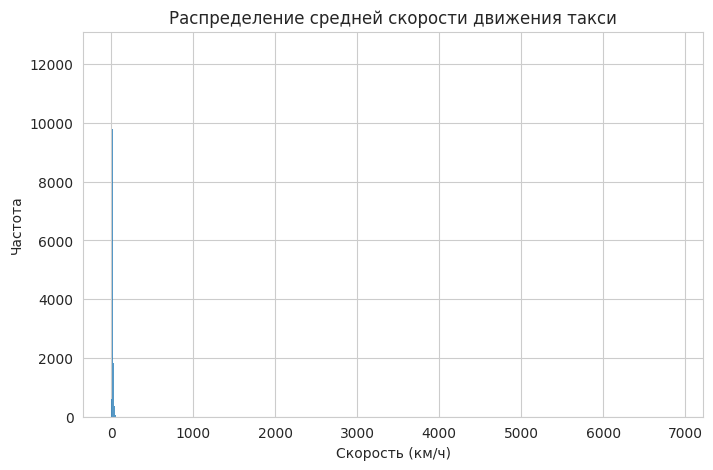

In [179]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['avg_speed'])
plt.title('Распределение средней скорости движения такси')
plt.xlabel('Скорость (км/ч)')
plt.ylabel('Частота')
sns.set_style('whitegrid')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

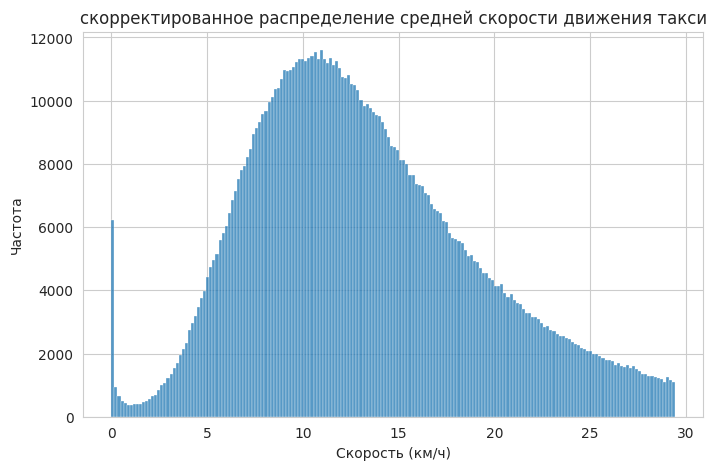

In [180]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(8, 5))
pididi = train_df['avg_speed']
interval = np.quantile(pididi, 0.95)
sns.histplot(pididi, binrange=[0, interval])
plt.title('скорректированное распределение средней скорости движения такси')
plt.xlabel('Скорость (км/ч)')
plt.ylabel('Частота')
sns.set_style('whitegrid')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

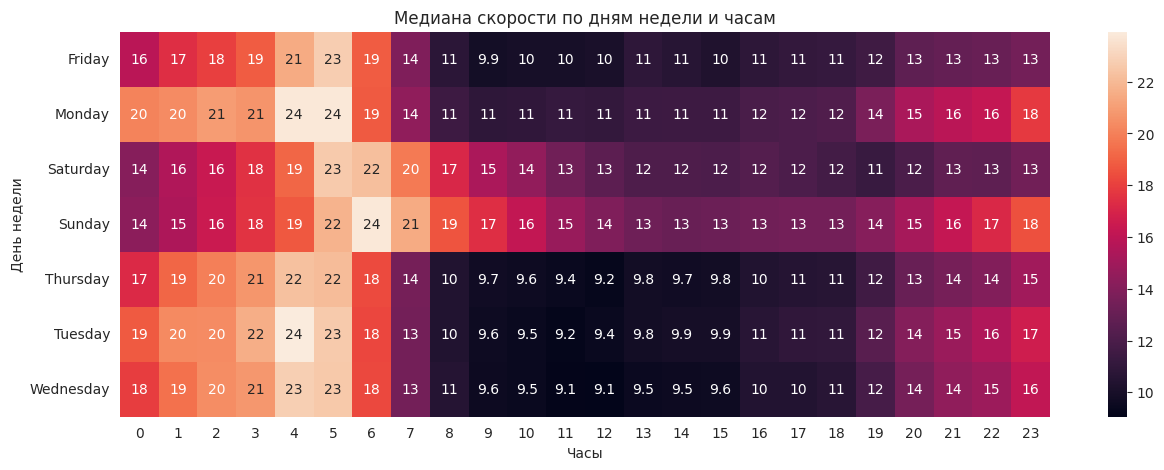

In [181]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
median_speed = train_df.groupby(['day_of_week', 'hour'])['avg_speed'].median().reset_index()
median_speed_pivot = median_speed.pivot(index='day_of_week', columns='hour', values='avg_speed')
plt.figure(figsize=(15, 5))
sns.heatmap(median_speed_pivot, annot=True)
plt.title('Медиана скорости по дням недели и часам')
plt.xlabel('Часы')
plt.ylabel('День недели')
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Потому что признак средней скорости напрямую зависит от целевой переменной, обучение при известной средней скорости будет неэффективным, тк модель будет "подглядывать" в целевую переменную через скорость

In [182]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df = train_df.drop('avg_speed', axis=1)
train_df.sample(1)

id  vendor_id     pickup_datetime  passenger_count  \
371831  id0394213          2 2016-06-16 10:39:02                5   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
371831        -73.977226        40.786076         -73.972923   

        dropoff_latitude store_and_fwd_flag  log_trip_duration day_of_week  \
371831         40.795628                  N           6.161207    Thursday   

        month  hour  is_anomalia_airport  is_anomalia_snow  number_of_day  \
371831      6    10                False             False            168   

        haversine  log_haversine  
371831   1.122209       0.752458

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Минимальная скорость достигается в будние дни в период с 9 утра до 19 дня. Максимальная скорость достигается во все дни в 4-5 утра.


Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [183]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df['trip_in_traffic_jam'] = (
    train_df['pickup_datetime'].dt.hour.isin(range(9, 16)) &
    train_df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
)
train_df['trip_in_free_roads'] = train_df['pickup_datetime'].dt.hour.isin([3, 4, 5, 6])


In [184]:
train_df.sample(1)

id  vendor_id     pickup_datetime  passenger_count  \
859098  id0848445          1 2016-03-11 21:59:58                1   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
859098        -73.983467         40.75005         -73.979507   

        dropoff_latitude store_and_fwd_flag  log_trip_duration day_of_week  \
859098         40.736897                  N           6.192362      Friday   

        month  hour  is_anomalia_airport  is_anomalia_snow  number_of_day  \
859098      3    21                False             False             71   

        haversine  log_haversine  trip_in_traffic_jam  trip_in_free_roads  
859098   1.500115       0.916337                False               False

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?


Empire State Building: 40.74622090957055, -73.98486319433474

Theater District 40.761977929853444, -73.98333103166938

Местный аэропорт: 40.64768731977002, -73.77983364666763


In [185]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


train_df['start_state_building'] = np.where(haversine_array(train_df['pickup_latitude'], train_df['pickup_longitude'], 40.74622090957055, -73.98486319433474) <= 4, True, False)
train_df['finish_state_building'] = np.where(haversine_array(train_df['dropoff_latitude'], train_df['dropoff_longitude'], 40.74622090957055, -73.984863194334746) <= 4, True, False)

train_df['start_theater_district'] = np.where(haversine_array(train_df['pickup_latitude'], train_df['pickup_longitude'], 40.761977929853444, -73.98333103166938) <= 4, True, False)
train_df['finish_theater_district'] = np.where(haversine_array(train_df['dropoff_latitude'], train_df['dropoff_longitude'], 40.761977929853444, -73.98333103166938) <= 4, True, False)

train_df['start_airport'] = np.where(haversine_array(train_df['pickup_latitude'], train_df['pickup_longitude'], 40.64768731977002, -73.77983364666763) <= 4, True, False)
train_df['finish_airport'] = np.where(haversine_array(train_df['dropoff_latitude'], train_df['dropoff_longitude'], 40.64768731977002, -73.77983364666763) <= 4, True, False)

In [186]:
train_df['finish_airport'].nunique()

2

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

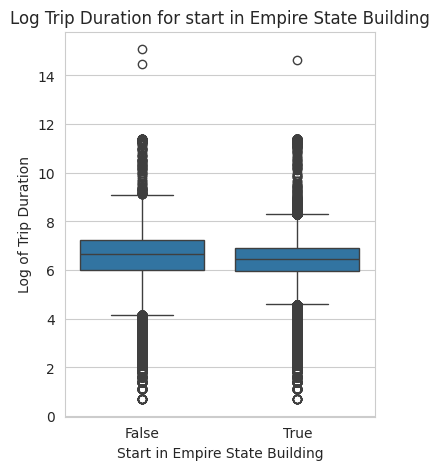

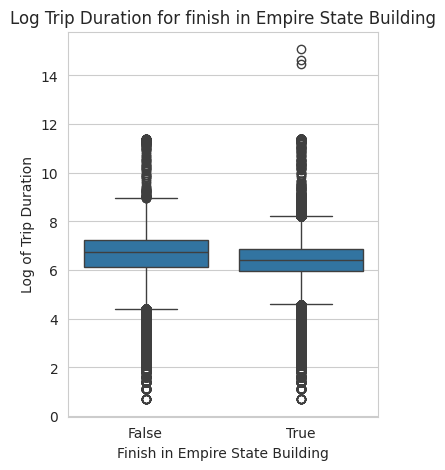

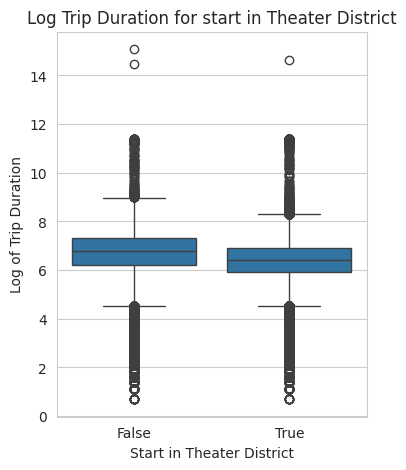

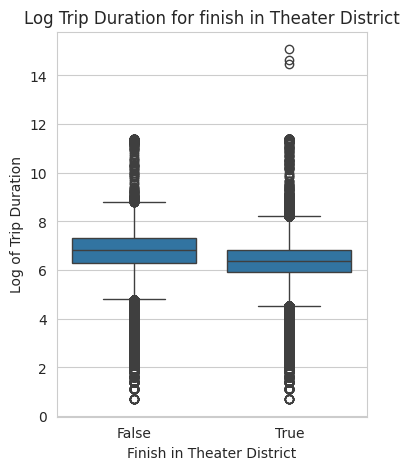

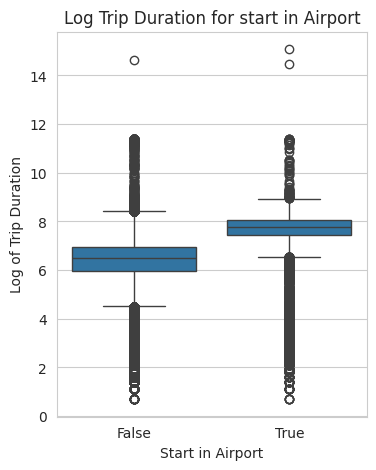

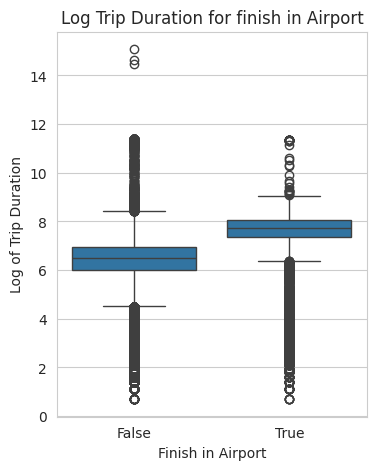

In [187]:
plt.figure(figsize=(4, 5))
sns.boxplot(x='start_state_building', y='log_trip_duration', data=train_df)
plt.title('Log Trip Duration for start in Empire State Building')
plt.xlabel('Start in Empire State Building')
plt.ylabel('Log of Trip Duration')
plt.show()

plt.figure(figsize=(4, 5))
sns.boxplot(x='finish_state_building', y='log_trip_duration', data=train_df)
plt.title('Log Trip Duration for finish in Empire State Building')
plt.xlabel('Finish in Empire State Building')
plt.ylabel('Log of Trip Duration')
plt.show()

plt.figure(figsize=(4, 5))
sns.boxplot(x='start_theater_district', y='log_trip_duration', data=train_df)
plt.title('Log Trip Duration for start in Theater District')
plt.xlabel('Start in Theater District')
plt.ylabel('Log of Trip Duration')
plt.show()

plt.figure(figsize=(4, 5))
sns.boxplot(x='finish_theater_district', y='log_trip_duration', data=train_df)
plt.title('Log Trip Duration for finish in Theater District')
plt.xlabel('Finish in Theater District')
plt.ylabel('Log of Trip Duration')
plt.show()

plt.figure(figsize=(4, 5))
sns.boxplot(x='start_airport', y='log_trip_duration', data=train_df)
plt.title('Log Trip Duration for start in Airport')
plt.xlabel('Start in Airport')
plt.ylabel('Log of Trip Duration')
plt.show()

plt.figure(figsize=(4, 5))
sns.boxplot(x='finish_airport', y='log_trip_duration', data=train_df)
plt.title('Log Trip Duration for finish in Airport')
plt.xlabel('Finish in Airport')
plt.ylabel('Log of Trip Duration')
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Как будто не очень, мне кажется, очень много выбросов, хотя верхняя-нижняя квантиль достаточно быстро друг другу, это плюс.

Ну и опять же, мы указываем конкретную точку, но если клиент заказывает такси в 10 метрах от указанной точки, то они уже не получат True в признаке, хотя он по сути будет в той же ситуации, поэтому я использовала приближение при формировании признака, но это все еще не кажется мне надежным решением

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [188]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, rows=4, columns=3):
        self.rows = rows
        self.columns = columns
        self.lat_min = 0
        self.lat_max = 0
        self.long_min = 0
        self.long_max = 0
        self.icheika_lat = 0
        self.icheika_long = 0
        self.longitudes = None
        self.latitudes = None
        pass

    def show_map(self):
        location = (np.mean(self.latitudes), np.mean(self.longitudes))
        m = folium.Map(location=location)

        folium.Rectangle(
            bounds = [[self.lat_min, self.long_min], [self.lat_max, self.long_max]],
            color='blue'
        ).add_to(m)


        for i in range(self.columns + 1):
            long = self.long_min + i * self.icheika_long
            folium.PolyLine([(self.lat_min, long), (self.lat_max, long)], color='blue', weight=1).add_to(m)

        for j in range(self.rows + 1):
            lat = self.lat_min + j * self.icheika_lat
            folium.PolyLine([(lat, self.long_min), (lat, self.long_max)], color='blue', weight=1).add_to(m)

        return m

    def fit(self, X=None, y=None):
        self.longitudes = pd.concat([X['pickup_longitude'], X['dropoff_longitude']]).values
        self.latitudes = pd.concat([X['pickup_latitude'], X['dropoff_latitude']]).values

        self.lat_min = np.percentile(X['pickup_latitude'], 10) #персентили, чтобы сетка захватывала только центр, а не разлеталась по всему городу
        self.lat_max = np.percentile(X['pickup_latitude'], 90)
        self.long_min = np.percentile(X['pickup_longitude'], 10)
        self.long_max = np.percentile(X['pickup_longitude'], 90)
        self.icheika_lat = (self.lat_max - self.lat_min) / self.rows
        self.icheika_long = (self.long_max - self.long_min) / self.columns

        return self

    def transform(self, X, y=None):
      X = X.copy()
      X['start_icheika'] = -1
      X['finish_icheika'] = -1

      start_kriterii = ((X['pickup_latitude'] <= self.lat_max) & (X['pickup_latitude'] >= self.lat_min)
      & (X['pickup_longitude'] >= self.long_min) & (X['pickup_longitude'] <= self.long_max))

      finish_kriterii = ((X['dropoff_latitude'] <= self.lat_max) & (X['dropoff_latitude'] >= self.lat_min)
      & (X['dropoff_longitude'] >= self.long_min) & (X['dropoff_longitude'] <= self.long_max))

      X.loc[start_kriterii, 'start_icheika'] = (
            ((X.loc[start_kriterii, 'pickup_latitude'] - self.lat_min) // self.icheika_lat) * self.columns +
            ((X.loc[start_kriterii, 'pickup_longitude'] - self.long_min) // self.icheika_long)
        ).astype(int)

      X.loc[finish_kriterii, 'finish_icheika'] = (
            ((X.loc[finish_kriterii, 'dropoff_latitude'] - self.lat_min) // self.icheika_lat) * self.columns +
            ((X.loc[finish_kriterii, 'dropoff_longitude'] - self.long_min) // self.icheika_long)
        ).astype(int)

      return X


In [189]:

transformer = MapGridTransformer(rows=5, columns=3)


transformer.fit(df.sample(1000))
transformer.show_map()

In [190]:
transformer = MapGridTransformer(rows=5, columns=3)
transformer.fit(train_df)
train_df = transformer.transform(train_df)

transformer = MapGridTransformer(rows=5, columns=3)
transformer.fit(tets_df)
tets_df = transformer.transform(tets_df)

In [191]:
train_df.sample(10)

id  vendor_id     pickup_datetime  passenger_count  \
598995   id2064421          1 2016-02-10 06:58:06                1   
23745    id1850332          1 2016-03-25 23:52:41                1   
553708   id1544991          1 2016-06-11 16:13:09                2   
724860   id0948145          2 2016-01-27 20:48:55                2   
1055470  id0441722          1 2016-04-23 14:35:51                1   
1016033  id3506171          1 2016-03-11 20:52:26                1   
949477   id2231836          2 2016-05-25 12:24:10                1   
1364725  id3357541          2 2016-05-12 20:11:04                1   
1450160  id1595651          2 2016-06-30 19:18:14                2   
580105   id2020498          2 2016-03-22 16:34:18                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
598995         -73.989754        40.757027         -73.977394   
23745          -73.977661        40.754948         -73.833542   
553708         -73.975998        40.749733         -73.982094   
724860         -73.970314        40.756340         -73.982208   
1055470        -73.991982        40.730957         -73.975365   
1016033        -73.988022        40.737720         -73.970207   
949477         -73.951553        40.769806         -73.960800   
1364725        -73.982803        40.753132         -73.999924   
1450160        -73.972031        40.745731         -73.949722   
580105         -73.989342        40.748791         -73.978607   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  ...  \
598995          40.758873                  N           5.429346  ...   
23745           40.762718                  N           7.755339  ...   
553708          40.714619                  N           7.051856  ...   
724860          40.770695                  N           6.347389  ...   
1055470         40.760307                  N           7.311886  ...   
1016033         40.749645                  N           6.249975  ...   
949477          40.774052                  N           6.421622  ...   
1364725         40.738548                  N           6.304449  ...   
1450160         40.773651                  N           6.630683  ...   
580105          40.752579                  N           6.028279  ...   

        trip_in_traffic_jam  trip_in_free_roads  start_state_building  \
598995                False                True                  True   
23745                 False               False                  True   
553708                False               False                  True   
724860                False               False                  True   
1055470               False               False                  True   
1016033               False               False                  True   
949477                 True               False                  True   
1364725               False               False                  True   
1450160               False               False                  True   
580105                False               False                  True   

         finish_state_building  start_theater_district  \
598995                    True                    True   
23745                    False                    True   
553708                    True                    True   
724860                    True                    True   
1055470                   True                    True   
1016033                   True                    True   
949477                    True                    True   
1364725                   True                    True   
1450160                  False                    True   
580105                    True                    True   

         finish_theater_district  start_airport  finish_airport  \
598995                      True          False           False   
23745                      False          False           False   
553708                     False          False           False   
724860                   

Вот на этом этапе я расщипилась на атомы

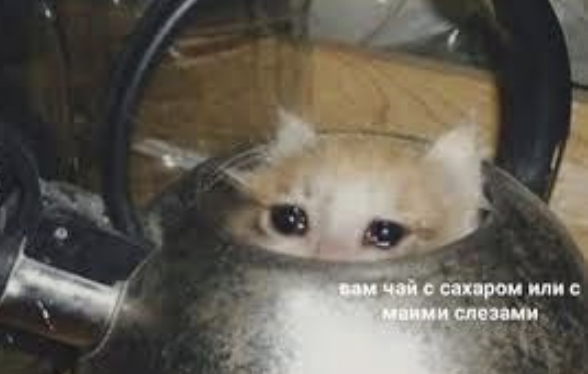

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [192]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
tets_df['trip_in_traffic_jam'] = (
    tets_df['pickup_datetime'].dt.hour.isin(range(9, 16)) &
    tets_df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
)
tets_df['trip_in_free_roads'] = tets_df['pickup_datetime'].dt.hour.isin([3, 4, 5, 6])


#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
tets_df['start_state_building'] = np.where(haversine_array(tets_df['pickup_latitude'], tets_df['pickup_longitude'], 40.74622090957055, -73.98486319433474) <= 4, True, False)
tets_df['finish_state_building'] = np.where(haversine_array(tets_df['dropoff_latitude'], tets_df['dropoff_longitude'], 40.74622090957055, -73.984863194334746) <= 4, True, False)

tets_df['start_theater_district'] = np.where(haversine_array(tets_df['pickup_latitude'], tets_df['pickup_longitude'], 40.761977929853444, -73.98333103166938) <= 4, True, False)
tets_df['finish_theater_district'] = np.where(haversine_array(tets_df['dropoff_latitude'], tets_df['dropoff_longitude'], 40.761977929853444, -73.98333103166938) <= 4, True, False)

tets_df['start_airport'] = np.where(haversine_array(tets_df['pickup_latitude'], tets_df['pickup_longitude'], 40.64768731977002, -73.77983364666763) <= 4, True, False)
tets_df['finish_airport'] = np.where(haversine_array(tets_df['dropoff_latitude'], tets_df['dropoff_longitude'], 40.64768731977002, -73.77983364666763) <= 4, True, False)

In [193]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
y_train = train_df["log_trip_duration"]
X_train = train_df[['day_of_week', 'month', 'hour', 'is_anomalia_snow', 'is_anomalia_airport', 'number_of_day', 'log_haversine',
                    'trip_in_traffic_jam', 'trip_in_free_roads', 'start_state_building', 'finish_state_building',
                    'start_theater_district', 'finish_theater_district', 'start_airport', 'finish_airport',
                    'start_icheika',	'finish_icheika']]
y_test = tets_df['log_trip_duration']
X_test = tets_df[['day_of_week', 'month', 'hour', 'is_anomalia_snow', 'is_anomalia_airport', 'number_of_day', 'log_haversine',
                    'trip_in_traffic_jam', 'trip_in_free_roads', 'start_state_building', 'finish_state_building',
                    'start_theater_district', 'finish_theater_district', 'start_airport', 'finish_airport',
                    'start_icheika',	'finish_icheika']]

categorical = list(X_train.dtypes[(X_train.dtypes == "object") | (X_train.dtypes == "bool")].index)
categorical.append('start_icheika')
categorical.append('finish_icheika')

numeric_data = X_train.select_dtypes([np.number])
numeric_features = numeric_data.columns


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = Ridge()
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.4856
Train RMSE = 0.4832


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Каждый перевозчик потенциально обладает своей спецификой, например у кого-то доступны отказы от заказа, тогда таксисты могут не брать короткие поездки, что поможет предсказывать длительность поездки.

Количество пассажиров тоже может давать представление о длительности поездки, так как люди могут заказывать одно такси на всех и ставить несколько точек, развозя всех по домам, как итог длительность поездки будет выше

Сразу или не сразу отправились данные тоже может указывать на то, что заказов сейчас много или на то, что поездка началась где то в лесу хз и ехать доло, так что это тоже влияет на показатель длительности поездки

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [194]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('for vendor_id:', df['vendor_id'].nunique())
print('for passenger_count:', df['passenger_count'].nunique())
print('for store_and_fwd_flag:', df['store_and_fwd_flag'].nunique())

for vendor_id: 2
for passenger_count: 10
for store_and_fwd_flag: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

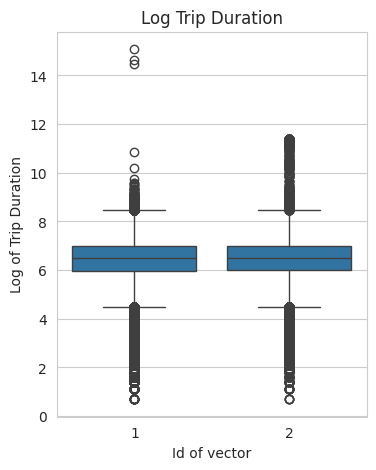

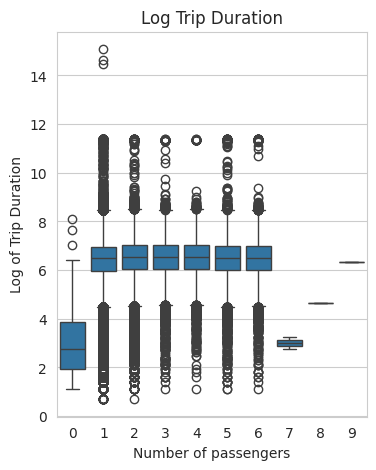

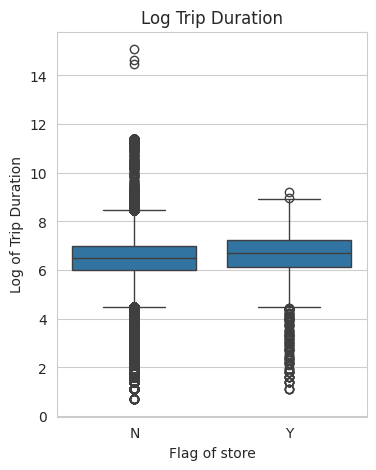

In [195]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(4, 5))
sns.boxplot(x='vendor_id', y='log_trip_duration', data=train_df)
plt.title('Log Trip Duration')
plt.xlabel('Id of vector')
plt.ylabel('Log of Trip Duration')
plt.show()

plt.figure(figsize=(4, 5))
sns.boxplot(x='passenger_count', y='log_trip_duration', data=train_df)
plt.title('Log Trip Duration')
plt.xlabel('Number of passengers')
plt.ylabel('Log of Trip Duration')
plt.show()

plt.figure(figsize=(4, 5))
sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=train_df)
plt.title('Log Trip Duration')
plt.xlabel('Flag of store')
plt.ylabel('Log of Trip Duration')
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [196]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df['vendor_id'] = train_df['vendor_id'].replace(2, 0)

train_df['store_and_fwd_flag'] = train_df['store_and_fwd_flag'].replace('Y', 1)
train_df['store_and_fwd_flag'] = train_df['store_and_fwd_flag'].replace('N', 0)

<ipython-input-196-cffcd83fbe40>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['store_and_fwd_flag'] = train_df['store_and_fwd_flag'].replace('N', 0)


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Аналогично предыдущему построению ящиков с усами, присутсвует очень много выбросов, так что сложно назвать признаки сильными

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [197]:
tets_df['vendor_id'] = tets_df['vendor_id'].replace(2, 0)

tets_df['store_and_fwd_flag'] = tets_df['store_and_fwd_flag'].replace('Y', 1)
tets_df['store_and_fwd_flag'] = tets_df['store_and_fwd_flag'].replace('N', 0)

<ipython-input-197-82d3a64cac43>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tets_df['store_and_fwd_flag'] = tets_df['store_and_fwd_flag'].replace('N', 0)


In [198]:
train_df = train_df.drop('id', axis=1)
tets_df = tets_df.drop('id', axis=1)

In [199]:
X_train.columns

Index(['day_of_week', 'month', 'hour', 'is_anomalia_snow',
       'is_anomalia_airport', 'number_of_day', 'log_haversine',
       'trip_in_traffic_jam', 'trip_in_free_roads', 'start_state_building',
       'finish_state_building', 'start_theater_district',
       'finish_theater_district', 'start_airport', 'finish_airport',
       'start_icheika', 'finish_icheika'],
      dtype='object')

In [200]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


y_train = train_df["log_trip_duration"]
X_train = train_df.loc[:, train_df.columns != 'log_trip_duration']

y_test = tets_df['log_trip_duration']
X_test = tets_df.loc[:,tets_df.columns != 'log_trip_duration']

categorical = list(X_train.dtypes[(X_train.dtypes == "object") | (X_train.dtypes == "bool")].index)
categorical.append('start_icheika')
categorical.append('finish_icheika')
categorical.append('vendor_id')
categorical.append('store_and_fwd_flag')
numeric_data = X_train.select_dtypes([np.number])
numeric_data = numeric_data.drop('finish_icheika', axis=1)
numeric_data = numeric_data.drop('start_icheika', axis=1)
numeric_data = numeric_data.drop('vendor_id', axis=1)
numeric_data = numeric_data.drop('store_and_fwd_flag', axis=1)

numeric_features = numeric_data.columns


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = Ridge()
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.4829
Train RMSE = 0.4772


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

Каких-то особо сильных изменений нет, так что удаляем

In [201]:
train_df = train_df.drop('vendor_id', axis=1)
train_df = train_df.drop('store_and_fwd_flag', axis=1)
train_df = train_df.drop('passenger_count', axis=1)

tets_df = tets_df.drop('vendor_id', axis=1)
tets_df = tets_df.drop('store_and_fwd_flag', axis=1)
tets_df = tets_df.drop('passenger_count', axis=1)

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

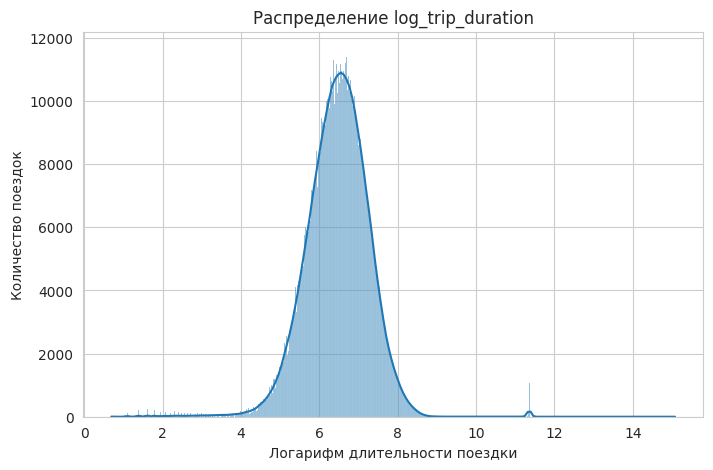

In [202]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
sns.histplot((train_df['log_trip_duration']), kde=True)
plt.title('Распределение log_trip_duration')
plt.xlabel('Логарифм длительности поездки')
plt.ylabel('Количество поездок')
plt.show()

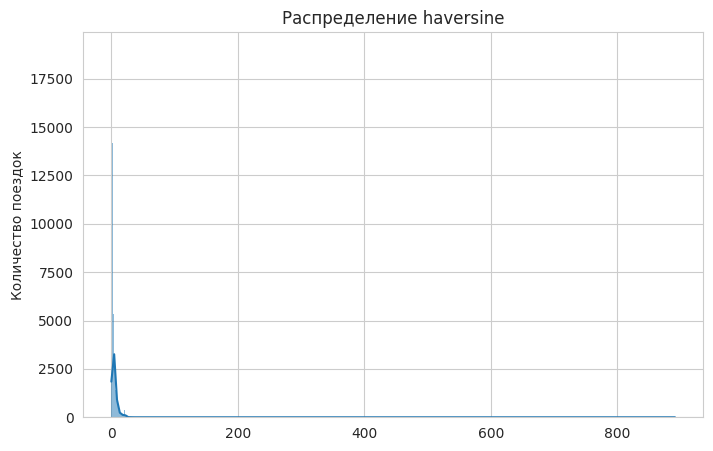

In [203]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
sns.histplot(train_df['haversine'], kde=True)
plt.title('Распределение haversine')
plt.xlabel('')
plt.ylabel('Количество поездок')
plt.show()

In [204]:
e = y_train - y_train_pred

In [205]:
train_df['RSS'] = e

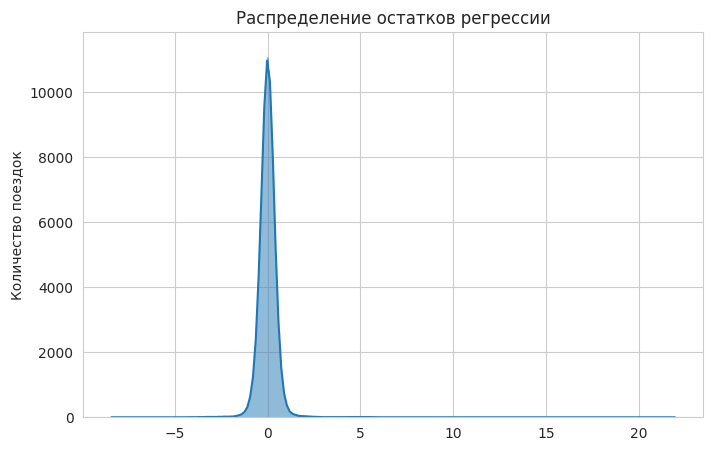

In [206]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
sns.histplot(e, kde=True)
plt.title('Распределение остатков регрессии')
plt.xlabel('')
plt.ylabel('Количество поездок')
plt.show()

In [207]:
train_df = train_df.loc[(train_df['log_trip_duration'] > 0.5) & (train_df['log_trip_duration'] < 14.5)]
train_df = train_df.loc[train_df['haversine'] < 200]
train_df = train_df.loc[(train_df['RSS'] < 10) & (train_df['RSS'] > -10)]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

Нет смысла проверять все признаки, но точно можно сказать, что у признаков по типу "поездка совершалась из аэропорта" потенциально мало тех, кто вошел в эту категорию. Посмотрим на них с помощью круговых диаграм

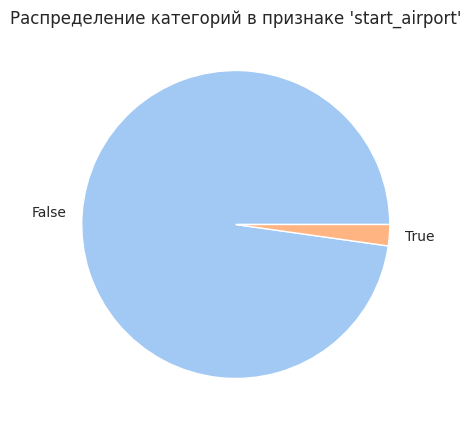

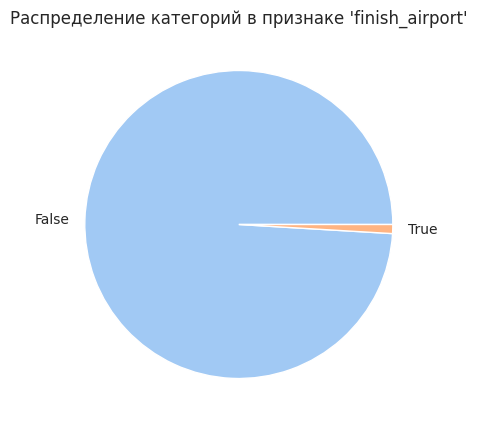

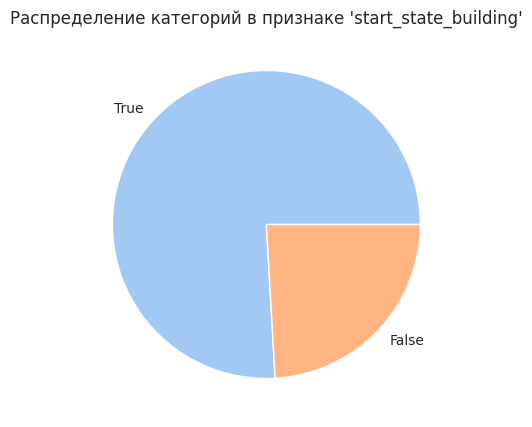

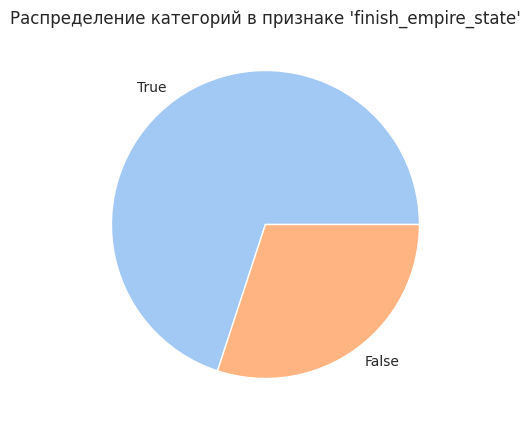

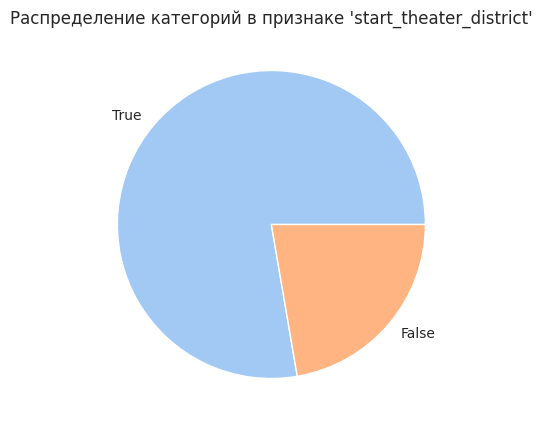

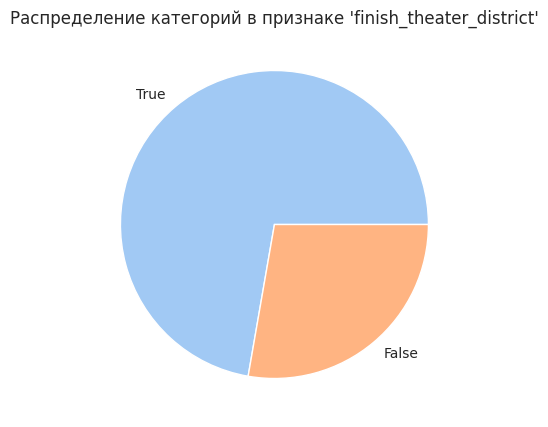

In [208]:
feature_counts = train_df['start_airport'].dropna().value_counts()
plt.figure(figsize=(5, 5))
plt.pie(feature_counts, labels=feature_counts.index, colors=sns.color_palette("pastel"))
plt.title("Распределение категорий в признаке 'start_airport'")
plt.show()

feature_counts = train_df['finish_airport'].dropna().value_counts()
plt.figure(figsize=(5, 5))
plt.pie(feature_counts, labels=feature_counts.index, colors=sns.color_palette("pastel"))
plt.title("Распределение категорий в признаке 'finish_airport'")
plt.show()

feature_counts = train_df['start_state_building'].dropna().value_counts()
plt.figure(figsize=(5, 5))
plt.pie(feature_counts, labels=feature_counts.index, colors=sns.color_palette("pastel"))
plt.title("Распределение категорий в признаке 'start_state_building'")
plt.show()

feature_counts = train_df['finish_state_building'].dropna().value_counts()
plt.figure(figsize=(5, 5))
plt.pie(feature_counts, labels=feature_counts.index, colors=sns.color_palette("pastel"))
plt.title("Распределение категорий в признаке 'finish_empire_state'")
plt.show()


feature_counts = train_df['start_theater_district'].dropna().value_counts()
plt.figure(figsize=(5, 5))
plt.pie(feature_counts, labels=feature_counts.index, colors=sns.color_palette("pastel"))
plt.title("Распределение категорий в признаке 'start_theater_district'")
plt.show()

feature_counts = train_df['finish_theater_district'].dropna().value_counts()
plt.figure(figsize=(5, 5))
plt.pie(feature_counts, labels=feature_counts.index, colors=sns.color_palette("pastel"))
plt.title("Распределение категорий в признаке 'finish_theater_district'")
plt.show()

In [209]:
#Объединяем для аэропорта
train_df['airport_involved'] = train_df['start_airport'] | train_df['finish_airport']
tets_df['airport_involved'] = tets_df['start_airport'] | tets_df['finish_airport']

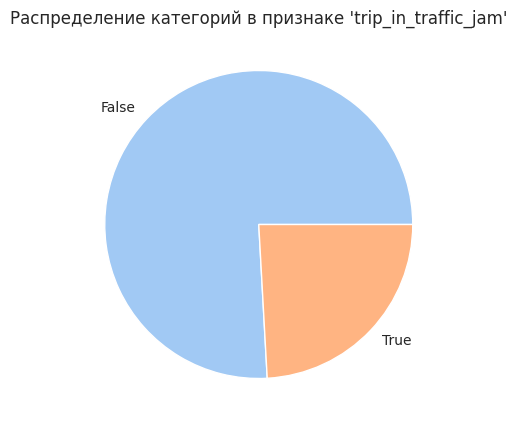

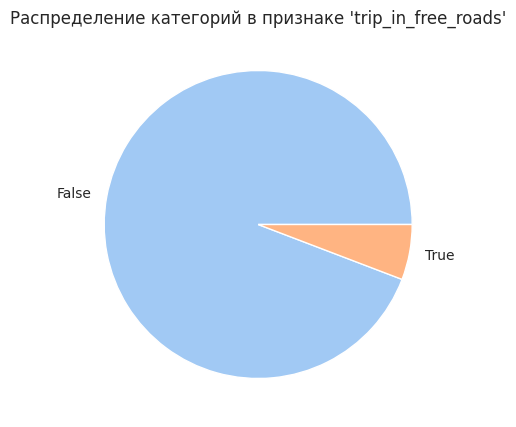

In [210]:
feature_counts = train_df['trip_in_traffic_jam'].dropna().value_counts()
plt.figure(figsize=(5, 5))
plt.pie(feature_counts, labels=feature_counts.index, colors=sns.color_palette("pastel"))
plt.title("Распределение категорий в признаке 'trip_in_traffic_jam'")
plt.show()

feature_counts = train_df['trip_in_free_roads'].dropna().value_counts()
plt.figure(figsize=(5, 5))
plt.pie(feature_counts, labels=feature_counts.index, colors=sns.color_palette("pastel"))
plt.title("Распределение категорий в признаке 'trip_in_free_roads'")
plt.show()

In [211]:
train_df.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'log_trip_duration',
       'day_of_week', 'month', 'hour', 'is_anomalia_airport',
       'is_anomalia_snow', 'number_of_day', 'haversine', 'log_haversine',
       'trip_in_traffic_jam', 'trip_in_free_roads', 'start_state_building',
       'finish_state_building', 'start_theater_district',
       'finish_theater_district', 'start_airport', 'finish_airport',
       'start_icheika', 'finish_icheika', 'RSS', 'airport_involved'],
      dtype='object')

In [212]:
#также можно сразу объединить 2 признака для аномалий, так как там всего по 1 дню в каждой категории
train_df['is_anomalia'] = train_df['is_anomalia_snow'] | train_df['is_anomalia_airport']
tets_df['is_anomalia'] = tets_df['is_anomalia_snow'] | tets_df['is_anomalia_airport']

In [213]:
train_df = train_df.drop('RSS', axis=1) #я добавляла ее для построения графика, но ее нельзя оставлять, так как из-за нее мы подглядываем в истинные значения y

In [214]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
y_train = train_df["log_trip_duration"]
X_train = train_df.loc[:, train_df.columns != 'log_trip_duration']

y_test = tets_df['log_trip_duration']
X_test = tets_df.loc[:,tets_df.columns != 'log_trip_duration']

categorical = list(X_train.dtypes[(X_train.dtypes == "object") | (X_train.dtypes == "bool")].index)
categorical.append('start_icheika')
categorical.append('finish_icheika')
numeric_data = X_train.select_dtypes([np.number])
numeric_data = numeric_data.drop('finish_icheika', axis=1)
numeric_data = numeric_data.drop('start_icheika', axis=1)
numeric_features = numeric_data.columns


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = Ridge()
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.4941
Train RMSE = 0.4733


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

Качество упало(((

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [215]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df.shape[1]

26

In [216]:
shape_new = model['ohe_and_scaling'].transformers_[0][1].get_feature_names_out(categorical).shape[0] + len(numeric_features)
shape_new

74

До кодирования - 26

После кодирования - 74

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [217]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

y_train = train_df["log_trip_duration"]
X_train = train_df.loc[:, train_df.columns != 'log_trip_duration']

y_test = tets_df['log_trip_duration']
X_test = tets_df.loc[:,tets_df.columns != 'log_trip_duration']

categorical = list(X_train.dtypes[(X_train.dtypes == "object") | (X_train.dtypes == "bool")].index)
categorical.append('start_icheika')
categorical.append('finish_icheika')
numeric_data = X_train.select_dtypes([np.number])
numeric_data = numeric_data.drop('finish_icheika', axis=1)
numeric_data = numeric_data.drop('start_icheika', axis=1)
numeric_features = numeric_data.columns

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.7969
Train RMSE = 0.7952


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


При дефолтной альфе лассо работает хуже.

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [218]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_v_df, valid_df = train_test_split(train_df, test_size=0.2)

In [219]:

y_valid = valid_df["log_trip_duration"]
X_valid = valid_df.loc[:, train_df.columns != 'log_trip_duration']

In [221]:
from sklearn.model_selection import GridSearchCV
alphas = np.logspace(-4, 4, 25)
searcher_ridge = GridSearchCV(pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher_ridge.fit(X_valid, y_valid)

best_alpha = searcher_ridge.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 4.6416


In [222]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-4, 4, 25)
searcher_lasso = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher_lasso.fit(X_valid, y_valid)

best_alpha = searcher_lasso.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 0.0001


Сохраните наилучшее значение, как бенчмарк на будущее

In [223]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟдля лассо
best_rmsle = -searcher_lasso.best_score_
best_rmsle

0.474300315047491

In [224]:
best_rmsle_ridge = -searcher_ridge.best_score_
best_rmsle_ridge

0.4742151371166822

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [225]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

y_train = train_v_df["log_trip_duration"]
X_train = train_v_df.loc[:, train_df.columns != 'log_trip_duration']

y_test = tets_df['log_trip_duration']
X_test = tets_df.loc[:,tets_df.columns != 'log_trip_duration']

categorical = list(X_train.dtypes[(X_train.dtypes == "object") | (X_train.dtypes == "bool")].index)
categorical.append('start_icheika')
categorical.append('finish_icheika')
numeric_data = X_train.select_dtypes([np.number])
numeric_data = numeric_data.drop('finish_icheika', axis=1)
numeric_data = numeric_data.drop('start_icheika', axis=1)
numeric_features = numeric_data.columns

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline_alpha = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(0.0001))
])

model = lasso_pipeline_alpha.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.4923
Train RMSE = 0.4732


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


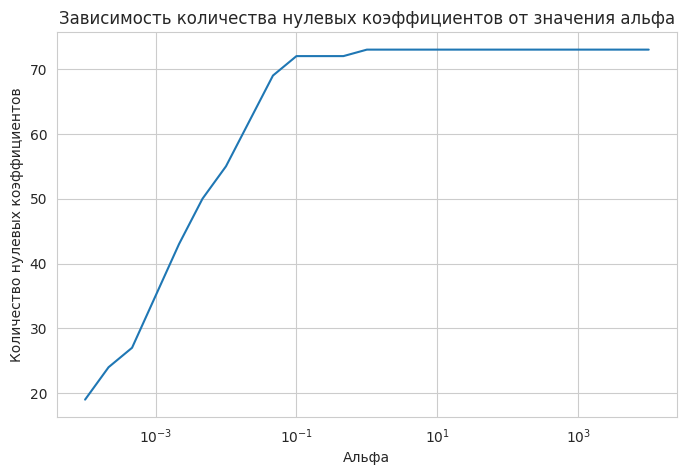

In [226]:
zeros = []
alphas = np.logspace(-4, 4, 25)
for alpha in alphas:
    lasso_pipeline_alpha = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Lasso(alpha=alpha))
    ])
    model_p = lasso_pipeline_alpha.fit(X_valid, y_valid)
    coef = model_p.named_steps['regression'].coef_
    ans = len(coef[coef == 0])
    zeros.append(ans)

plt.figure(figsize=(8, 5))


sns.lineplot(x=alphas, y=zeros)
plt.xscale("log")
plt.title('Зависимость количества нулевых коэффициентов от значения альфа')
plt.xlabel("Альфа")
plt.ylabel("Количество нулевых коэффициентов")
plt.show()

Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

ЭЭЭЭЭЭЭЭ очень сильно???? То есть по графику у нас почти все переменные нулевые при альфа >0.1, вообще где-то начиная с 0.01 половина переменных зануляется и при этом мы получаем результат, эквивалентный ридж регрессии только при 0.0001, короче не надо ничего удалять, плохо кончится.

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Этот признак - потенциально полезный, так как он позволяет учитывать популярные маршруты, комбинируя признаки и как бы указывает, на какие вариации надо обратить внимание.

In [227]:
need_pairs = train_df[(train_df['start_icheika'] >= 0) & (train_df['finish_icheika'] >= 0)]
voc_of_pairs = need_pairs.groupby(['start_icheika', 'finish_icheika']).size().nlargest(100).reset_index()[['start_icheika', 'finish_icheika']]
train_df['pair_num'] = -1

for i, row in voc_of_pairs.iterrows():
    start, finish = row['start_icheika'], row['finish_icheika']
    flag = (train_df['start_icheika'] == start) & (train_df['finish_icheika'] == finish)
    train_df.loc[flag, 'pair_num'] = i


In [228]:
need_pairs = tets_df[(train_df['start_icheika'] >= 0) & (tets_df['finish_icheika'] >= 0)]
voc_of_pairs = need_pairs.groupby(['start_icheika', 'finish_icheika']).size().nlargest(100).reset_index()[['start_icheika', 'finish_icheika']]
tets_df['pair_num'] = -1

for i, row in voc_of_pairs.iterrows():
    start, finish = row['start_icheika'], row['finish_icheika']
    flag = (tets_df['start_icheika'] == start) & (tets_df['finish_icheika'] == finish)
    tets_df.loc[flag, 'pair_num'] = i

<ipython-input-228-787bc18b0411>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  need_pairs = tets_df[(train_df['start_icheika'] >= 0) & (tets_df['finish_icheika'] >= 0)]


Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [229]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
y_train = train_df["log_trip_duration"]
X_train = train_df.loc[:, train_df.columns != 'log_trip_duration']

y_test = tets_df['log_trip_duration']
X_test = tets_df.loc[:,tets_df.columns != 'log_trip_duration']


categorical = list(X_train.dtypes[(X_train.dtypes == "object") | (X_train.dtypes == "bool")].index)
categorical.append('pair_num')
categorical.append('start_icheika')
categorical.append('finish_icheika')
numeric_data = X_train.select_dtypes([np.number])
numeric_data = numeric_data.drop('finish_icheika', axis=1)
numeric_data = numeric_data.drop('start_icheika', axis=1)
numeric_data = numeric_data.drop('pair_num', axis=1)

numeric_features = numeric_data.columns


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = Ridge()
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.4957
Train RMSE = 0.4676


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

Манхэттенское расстояние выглядит так:

(Это картинка из интернета, не моя)


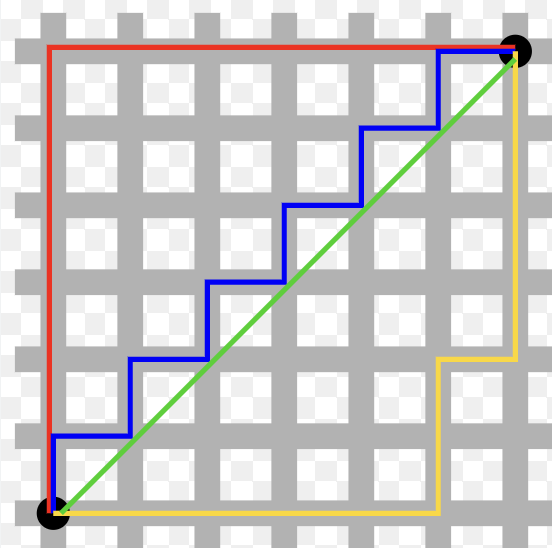

И считается как сумма подулей разности координат точек. Оно может бы полезным, так как представляет еще одну интерпретацию длины маршрута, что может помочь уменьшить "шум" в признаках для модели.

Путем использования сети интернет я узнала, что чтобы улица Манхэттена находятся под углом 29 градусов. Я так понимаю, что нам надо развернуть всю ось на 29 градусов К СЕВЕРУ (????) и пересчитать таким образом координаты.

In [230]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
a = np.radians(29)
train_df['pickup_latitude_new'] = train_df['pickup_latitude'] * np.cos(a) - train_df['pickup_longitude'] * np.sin(a)
train_df['dropoff_latitude_new'] = train_df['dropoff_latitude'] * np.cos(a) - train_df['dropoff_longitude'] * np.sin(a)

train_df['pickup_longitude_new'] = train_df['pickup_latitude'] * np.sin(a) + train_df['pickup_longitude'] * np.cos(a)
train_df['dropoff_longitude_new'] = train_df['dropoff_latitude'] * np.sin(a) + train_df['dropoff_longitude'] * np.cos(a)


In [231]:
train_df['manhettan_dist'] = abs(train_df['pickup_latitude'] - train_df['dropoff_latitude']) + abs(train_df['pickup_longitude'] - train_df['dropoff_longitude'])

In [232]:
train_df['manhettan_dist_log'] = np.log1p(train_df['manhettan_dist'])

In [233]:
correlation = train_df['manhettan_dist'].corr(train_df['log_trip_duration'])
correlation

0.6026697850571626

In [234]:
correlation = train_df['manhettan_dist_log'].corr(train_df['log_trip_duration'])
correlation

0.6202416659142003

С логарифмом Манхеттонского расстояния корреляция выше

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [235]:
tets_df['pickup_latitude_new'] = tets_df['pickup_latitude'] * np.cos(a) - tets_df['pickup_longitude'] * np.sin(a)
tets_df['dropoff_latitude_new'] = tets_df['dropoff_latitude'] * np.cos(a) - tets_df['dropoff_longitude'] * np.sin(a)

tets_df['pickup_longitude_new'] = tets_df['pickup_latitude'] * np.sin(a) + tets_df['pickup_longitude'] * np.cos(a)
tets_df['dropoff_longitude_new'] = tets_df['dropoff_latitude'] * np.sin(a) + tets_df['dropoff_longitude'] * np.cos(a)

tets_df['manhettan_dist'] = abs(tets_df['pickup_latitude'] - tets_df['dropoff_latitude']) + abs(tets_df['pickup_longitude'] - tets_df['dropoff_longitude'])
tets_df['manhettan_dist_log'] = np.log1p(tets_df['manhettan_dist'])

In [236]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
y_train = train_df["log_trip_duration"]
X_train = train_df.loc[:, train_df.columns != 'log_trip_duration']

y_test = tets_df['log_trip_duration']
X_test = tets_df.loc[:,tets_df.columns != 'log_trip_duration']

categorical = list(X_train.dtypes[(X_train.dtypes == "object") | (X_train.dtypes == "bool")].index)
categorical.append('start_icheika')
categorical.append('finish_icheika')
numeric_data = X_train.select_dtypes([np.number])
numeric_data = numeric_data.drop('number_of_day', axis=1)
numeric_data = numeric_data.drop('start_icheika', axis=1)
numeric_data = numeric_data.drop('finish_icheika', axis=1)
numeric_features = numeric_data.columns


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = Ridge()
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.5146
Train RMSE = 0.4708


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE выросло. Это можно связать с тем, что впринципе от новых признаков модель ничего нового не узнала + манхеттонское расстояние потенциально может по другому трактовать местами расстояние между координатами, так как она работает с повернутой сеткой, тогда разная связь haversine и manhettan_dist может путать модель.

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

Для начала удалим все, что связано с манхеттенским расстоянием от греха подальше

In [237]:
train_df = train_df.drop('pickup_latitude_new', axis=1)
train_df = train_df.drop('dropoff_latitude_new', axis=1)
train_df = train_df.drop('pickup_longitude_new', axis=1)
train_df = train_df.drop('dropoff_longitude_new', axis=1)
train_df = train_df.drop('manhettan_dist', axis=1)
train_df = train_df.drop('manhettan_dist_log', axis=1)


tets_df = tets_df.drop('pickup_latitude_new', axis=1)
tets_df = tets_df.drop('dropoff_latitude_new', axis=1)
tets_df = tets_df.drop('pickup_longitude_new', axis=1)
tets_df = tets_df.drop('dropoff_longitude_new', axis=1)
tets_df = tets_df.drop('manhettan_dist', axis=1)
tets_df = tets_df.drop('manhettan_dist_log', axis=1)

Я поменяла метод стандартизации на PowerTransformer и тестовое рмсе упало на очень много -_- (на 0.2 где-то???)

In [239]:
from sklearn.preprocessing import PowerTransformer

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
y_train = train_df["log_trip_duration"]
X_train = train_df.loc[:, train_df.columns != 'log_trip_duration']

y_test = tets_df['log_trip_duration']
X_test = tets_df.loc[:,tets_df.columns != 'log_trip_duration']

categorical = list(X_train.dtypes[(X_train.dtypes == "object") | (X_train.dtypes == "bool")].index)
categorical.append('start_icheika')
categorical.append('finish_icheika')
categorical.append('number_of_day')
numeric_data = X_train.select_dtypes([np.number])
numeric_data = numeric_data.drop('number_of_day', axis=1)
numeric_data = numeric_data.drop('start_icheika', axis=1)
numeric_data = numeric_data.drop('finish_icheika', axis=1)
numeric_features = numeric_data.columns



column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', PowerTransformer(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = Ridge()
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.4701
Train RMSE = 0.4669


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

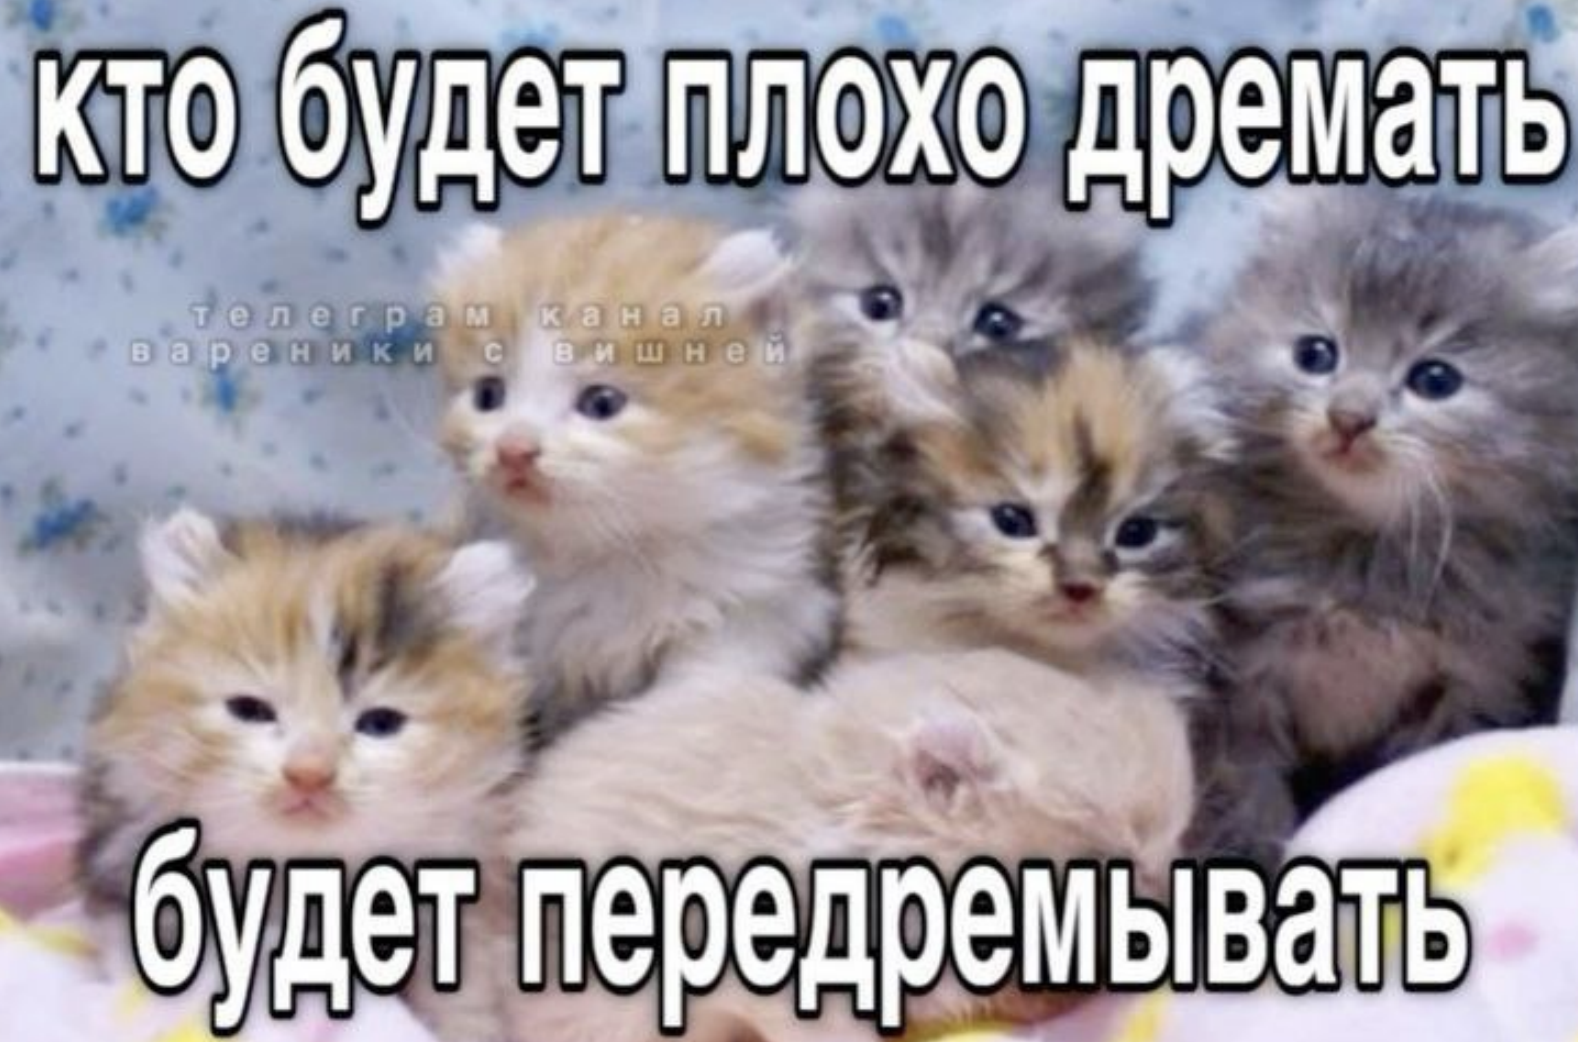

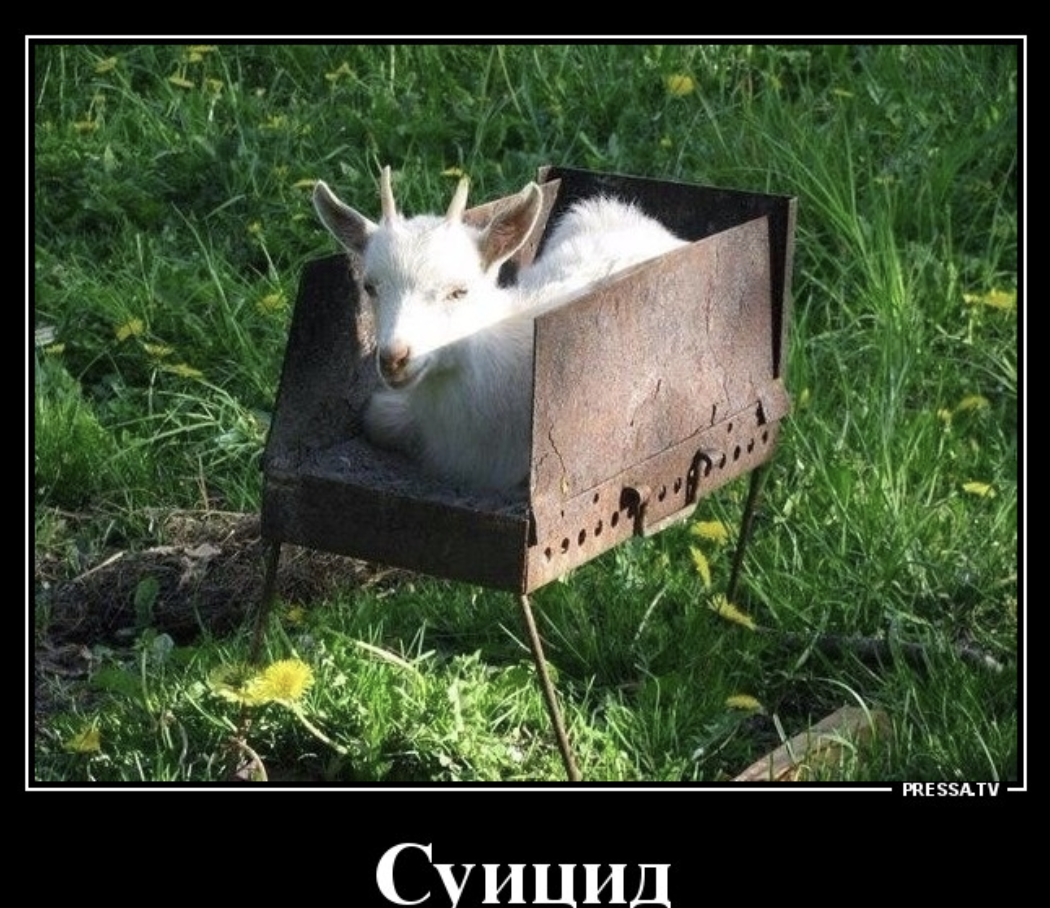